<a href="https://colab.research.google.com/github/mnbeebe/MLB/blob/main/MNIST_FrameworkTF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, utils
import matplotlib.pyplot as plt

# Load the Data

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

x_train = utils.normalize(x_train, axis = 1)
x_test = utils.normalize(x_test, axis = 1)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


# Look at an image

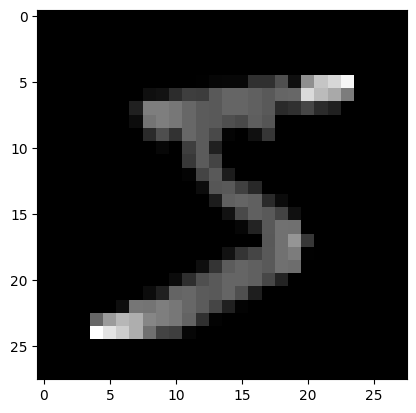

In [3]:
plt.imshow(x_train[0], cmap = 'gray')

# Build your model:

model = *code to create tensorflow Sequential model*

model.add( layers.Dense() )
  - Specify how many neurons, and activation function. ex( model.Dense(3, activation = 'sigmoid') )

model.add( layers.Flatten() )
  - Flattens the image into one flat line

After the model is created, you can do model.compile()
  - Specify loss function, and optimizer
  - ex. model.compile( loss = 'sparse_categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'] )




In [ ]:
#define your model here. ie, "model = <tensorflow syntax for sequential model>"
model = tf.keras.models.Sequential()

model.add(layers.Flatten())
model.add(layers.Dense(128, activation = 'relu'))
model.add(layers.Dense(128, activation = 'relu'))
model.add(layers.Dense(10, activation = 'softmax'))

model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [ ]:
#create your model here
model.fit(x_train, y_train, epochs=3)

Epoch 1/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8679 - loss: 0.4609
Epoch 2/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9655 - loss: 0.1096
Epoch 3/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9774 - loss: 0.0703


In [ ]:
val_loss, val_acc = model.evaluate(x_test, y_test)
print(val_loss, val_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9683 - loss: 0.1042
0.08553562313318253 0.9726999998092651


View your model in action

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


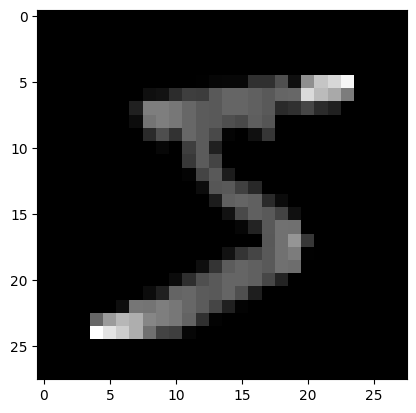

Prediction:  5


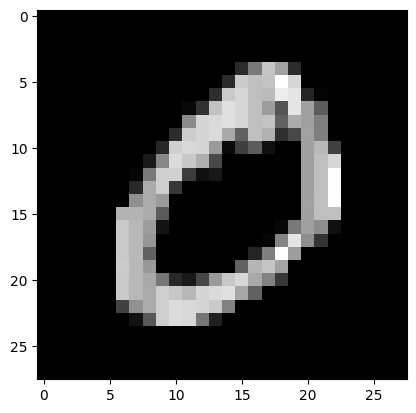

Prediction:  0


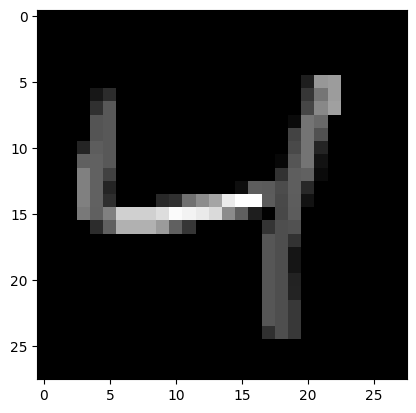

Prediction:  4


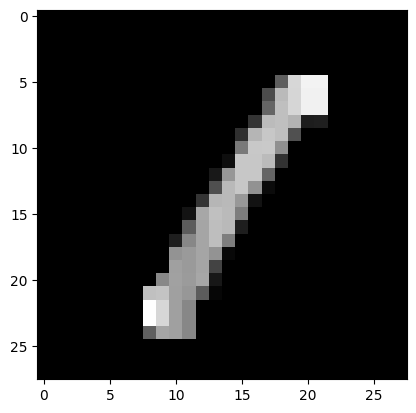

Prediction:  1


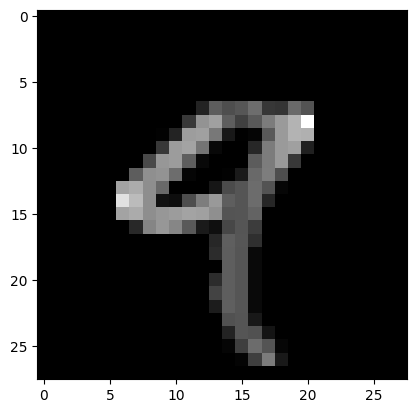

Prediction:  9


In [ ]:
number_of_images = 5

probabilities = model.predict(x_train[:number_of_images])
predictions = np.argmax(probabilities, axis=1)
for index in range(len(probabilities)):
  plt.imshow(x_train[index], cmap='gray')
  plt.show()
  print("Prediction: ", predictions[index])

Look at incorrect predictions:

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


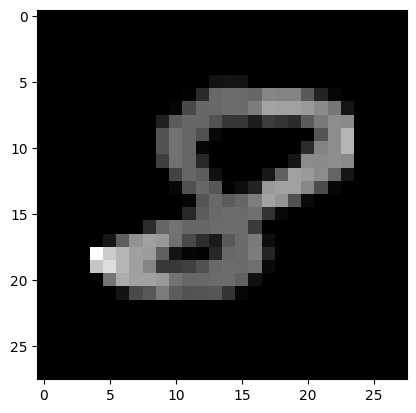

Prediction:  2
Actual:  8


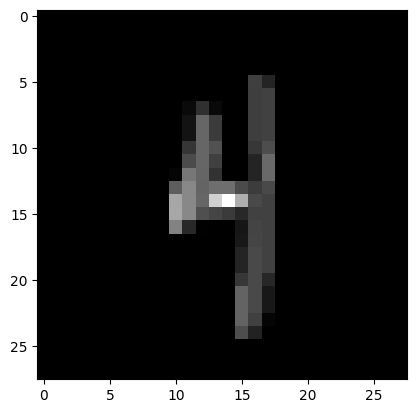

Prediction:  9
Actual:  4


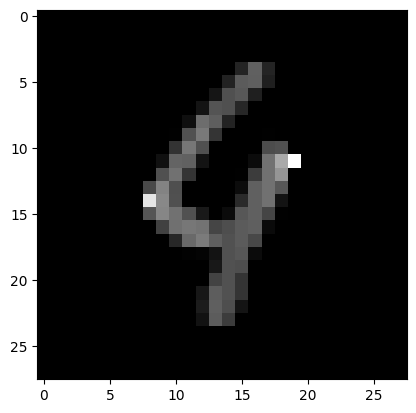

Prediction:  9
Actual:  4


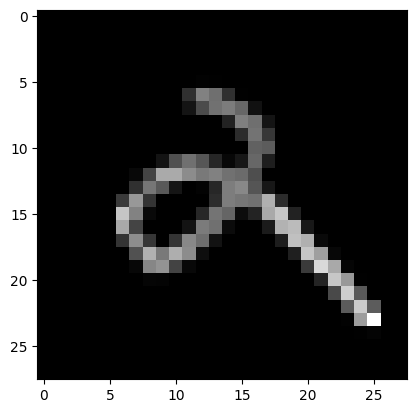

Prediction:  4
Actual:  2


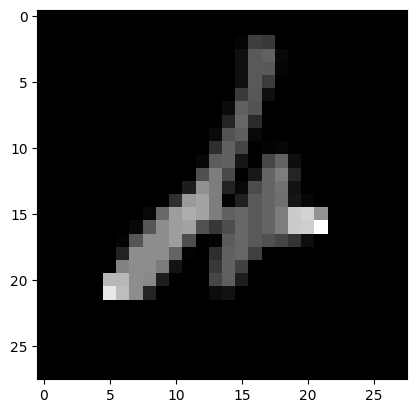

Prediction:  6
Actual:  4


In [ ]:
#code here
probabilities = model.predict(x_test)
predictions = np.argmax(probabilities, axis=1)
incorrect_predictions = np.where(predictions != y_test)[0]
for index in incorrect_predictions[:5]:
  plt.imshow(x_test[index], cmap='gray')
  plt.show()
  print("Prediction: ", predictions[index])
  print("Actual: ", y_test[index])